In [19]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pandas.DataFrame.from_csv('C:\Users\hawas\Documents\\tcost.csv', parse_dates = True, index_col = False)

data['abs_vol'] = abs(data.fillQty)
data['tcost'] = data.fillQty * (data.fillPx - data.arrivalPx) /data.arrivalPx
data['abs_dollar_vol'] = data.abs_vol * data.fillPx
#print data.date.unique()
# Parse daily average transaction costs

data_c = data.loc[data.algoid == 'Lima01'] + data.loc[data.algoid == 'Lima02']

date_slice = np.intersect1d(data[data.algoid=='Lima02']['date'], data[data.algoid=='Lima01']['date'] )
data_dslice = data.loc[data.date.isin(date_slice)]

algo1 = data_dslice[data_dslice.algoid == 'Lima01']
algo_1_costs = algo1.groupby('date').sum()['tcost'] / algo1.groupby('date').sum()['abs_vol']
algo_1_costs = np.array(algo_1_costs)


algo2 = data_dslice[data_dslice.algoid == 'Lima02']
algo_2_costs = algo2.groupby('date').sum()['tcost'] / algo2.groupby('date').sum()['abs_vol']
algo_2_costs = np.array(algo_2_costs)
np.set_printoptions(precision=5, suppress = True)

[ 0.00134 -0.00054  0.00015  0.00008  0.00052  0.00023 -0.001   -0.00094
 -0.00024  0.00003  0.00058  0.00051 -0.0007   0.00057  0.00025  0.00022
  0.00023  0.00032  0.00025 -0.0002   0.00018  0.00074 -0.00004 -0.00018
  0.00054  0.00035  0.00146  0.       0.00095  0.00033  0.00158  0.00051
  0.00115  0.00051  0.00074  0.00115  0.00029  0.00047  0.00058  0.0008
 -0.00033  0.00007  0.00055  0.00144 -0.00005  0.00037  0.00112  0.00062
  0.00051 -0.00048  0.00002  0.00013  0.00051  0.00075  0.00003  0.00137
  0.00141  0.00094 -0.0002   0.00517  0.00229 -0.00175  0.00161  0.00164
  0.00101  0.00041  0.001   -0.00051  0.00094 -0.00062  0.00102 -0.00152
  0.00018  0.00277 -0.00039 -0.00067  0.00109  0.00048 -0.00234  0.00212
  0.0027  -0.00002]


In [20]:
### Day count by algo

print data.groupby('algoid')['date'].agg({'day_count': lambda x: x.nunique(), 
                                          'first_date': lambda x:min(x), 
                                          'last_date': lambda x: max(x)} )

         last_date  day_count  first_date
algoid                                   
Kilo01    20160429        247    20150501
Lima01    20150826         82    20150501
Lima02    20160429        248    20150501
Oscar01   20160428        153    20150911
Tango01   20151112        137    20150501


In [22]:
#Totals by algo 
print data.groupby('algoid').sum()


                 date        fillPx  fillQty      arrivalPx   abs_vol  \
algoid                                                                  
Kilo01   535451028284  1469424.8044   225364  1469484.82500  46396614   
Lima01   583159002923  1644796.8175  -321417  1644724.68645  45133313   
Lima02   937521332453  2629801.6613  -804327  2629700.29485  82384275   
Oscar01  477890918217  1370969.1193  -541878  1370408.84555  38897068   
Tango01  519183549683  1438867.3787  -597134  1438778.83150  41883360   

                tcost  abs_dollar_vol  
algoid                                 
Kilo01   29802.305991    1.732970e+09  
Lima01   19394.357355    1.855943e+09  
Lima02   35493.074386    3.190565e+09  
Oscar01  11019.327923    1.520773e+09  
Tango01  35907.929579    1.611475e+09  


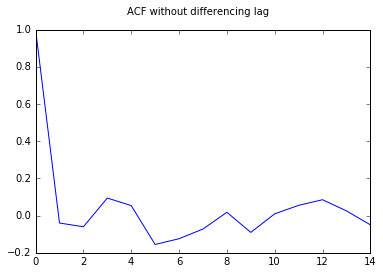

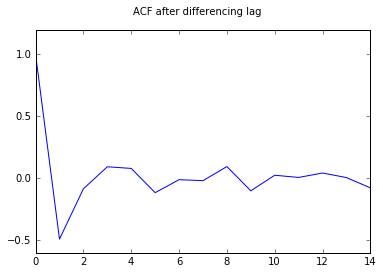

In [23]:
### Mean reversion

import statsmodels.tsa.stattools
tcosts_all =  data.groupby('date').sum()['tcost'] / data.groupby('date').sum()['abs_vol']

plt.figure(1)
plt.plot(xrange(15),statsmodels.tsa.stattools.acf(tcosts_all, nlags = 14) )
plt.suptitle('ACF without differencing lag')


plt.figure(2)
plt.plot(xrange(15),statsmodels.tsa.stattools.acf((tcosts_all - tcosts_all.shift(1))[1:len(tcosts_all)], nlags = 14)  )
plt.suptitle('ACF after differencing lag')
plt.show()


In [34]:
# Algorithm specific info
np.set_printoptions(precision=10, suppress = True)
print "Covariance matrix algo1 vs algo2"
print np.cov(algo_1_costs, algo_2_costs)
print "Correlation"
print np.correlate(algo_1_costs, algo_2_costs)
print "Algo 1 Mean"
print np.mean(algo_1_costs)
print "Algo 2 Mean"
print np.mean(algo_2_costs)

#Variance in algorithm specific noise
#print data.groupby('date').sum()['tcost'] / data.groupby('date').sum()['abs_vol']
print "Total variance"
print np.var(data.groupby('date').sum()['tcost'] / data.groupby('date').sum()['abs_vol'])


print "Total transaction cost mean"
print np.mean(data.groupby('date').sum()['tcost'] / data.groupby('date').sum()['abs_vol'])
print len(algo_1_costs)

Covariance matrix algo1 vs algo2
[[ 0.0000010365  0.000000056 ]
 [ 0.000000056   0.0000005615]]
Correlation
[ 0.0000168789]
Algo 1 Mean
0.000477353047421
Algo 2 Mean
0.000315309921554
Total variance
1.66548910058e-06
0.000530273399744
82


In [40]:
print "Stock specific noise"
all_dates = algo1.date.unique()
for d in all_dates:
    securities_today = algo1[algo1.date == d].secid.unique()
    

Stock specific noise
20150501 223 184
20150504 241 194
20150505 277 231
20150506 233 195
20150507 282 251
20150508 283 247
20150511 643 425
20150512 483 300
20150513 397 248
20150514 404 259
20150515 373 233
20150518 545 331
20150519 468 270
20150520 389 234
20150521 443 241
20150522 420 253
20150526 446 226
20150527 480 259
20150528 486 255
20150529 489 255
20150601 487 254
20150602 558 287
20150603 594 317
20150604 509 274
20150605 471 261
20150608 523 289
20150609 474 267
20150610 434 248
20150611 525 284
20150612 502 272
20150615 541 302
20150616 558 297
20150617 515 282
20150618 548 293
20150619 467 268
20150622 497 268
20150623 461 260
20150624 699 352
20150625 648 335
20150626 475 255
20150629 625 332
20150630 723 356
20150701 680 355
20150702 758 371
20150706 650 323
20150707 654 332
20150708 366 221
20150709 525 270
20150710 573 307
20150713 57 37
20150714 383 215
20150715 505 273
20150716 541 290
20150717 757 370
20150720 141 79
20150721 205 139
20150722 264 148
20150723 202 

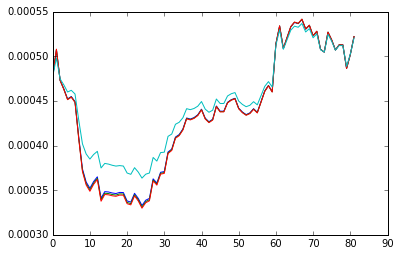

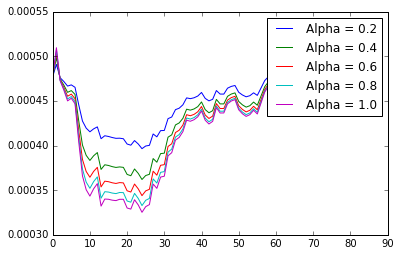

In [41]:
def kalman_step(tcost, est_x, est_p, alpha):
    y = tcost - est_x
    S = est_p + 0.0000168789 + 0.00001/alpha
    K = est_p/S
    #print K
    est_x =  0.99*(est_x+K*y) + 0.01*0.000530273399744  #new one
    est_p= (1-K)*est_p
    return {'newx_est':est_x, 'newp_est':est_p}


#alpha = 0.5

def kalman_model(algo_1_costs, algo_2_costs, alpha=-1 ):
    filter_1_x = [0.000477353047421]
    filter_1_p = [0.0000010365]

    filter_2_x = [0.000315309921554]
    filter_2_p = [0.0000005615]

    utility = 0
    realised_tcosts = []
    for i in xrange(0,81):
        #pick an alpha
        if(alpha == -1):
            alpha = np.random.uniform(size=1)
        utility += alpha*filter_1_x[i] + (1-alpha)*filter_2_x[i]
        tcost_1 = algo_1_costs[i]
        filter_step = kalman_step(tcost_1, filter_1_x[i], filter_1_p[i], alpha)
        filter_1_x.append(filter_step['newx_est'])
        filter_1_p.append(filter_step['newp_est'])
    
        tcost_2 = algo_2_costs[i]
        filter_step = kalman_step(tcost_2, filter_2_x[i], filter_2_p[i], alpha)
        filter_2_x.append(filter_step['newx_est'])
        filter_2_p.append(filter_step['newp_est'])
        realised_tcosts.append(alpha*filter_1_x[i] + (1-alpha)*filter_2_x[i])
    return (utility, filter_1_x, filter_2_x, realised_tcosts, filter_1_p, filter_2_p)
plt.figure(1)
u = []
for j in xrange(1,5):
    k=kalman_model(algo_1_costs, algo_2_costs)
    plt.plot(k[1])
    #plt.plot(k[1], label = 'Alpha = {0}'.format(j/float(5)))
    #u.append(k[0])
#plt.legend()
plt.plot(u)
plt.show()

plt.figure(2)
u = []
for j in xrange(1,6):
    k=kalman_model(algo_1_costs, algo_2_costs, j/float(5))
    plt.plot(k[1], label = 'Alpha = {0}'.format(j/float(5)))
    u.append(k[0])
plt.legend()
plt.show()


In [60]:

def kalman_step(tcost, est_x, est_p, alpha):
    y = tcost - est_x
    S = est_p + 0.1 + 0.2/alpha
    K = est_p/S
    #print K
    est_x =  0.9*(est_x+K*y) + 0.1*0.11  #new one
    est_p= (1-K)*est_p
    return {'newx_est':est_x, 'newp_est':est_p}


#alpha = 0.5

def kalman_model(alpha, algo_1_costs, algo_2_costs ):
    filter_1_x = [0.12]
    filter_1_p = [0.02]

    filter_2_x = [0.11]
    filter_2_p = [0.014]

    utility = 0
    for i in xrange(0,29):
        #pick an alpha
        utility += alpha*filter_1_x[i] + (1-alpha)*filter_2_x[i]
        tcost_1 = algo_1_costs[i]
        filter_step = kalman_step(tcost_1, filter_1_x[i], filter_1_p[i], alpha)
        filter_1_x.append(filter_step['newx_est'])
        filter_1_p.append(filter_step['newp_est'])

        tcost_2 = algo_2_costs[i]
        filter_step = kalman_step(tcost_2, filter_2_x[i], filter_2_p[i], alpha)
        filter_2_x.append(filter_step['newx_est'])
        filter_2_p.append(filter_step['newp_est'])
    return utility

import scipy.optimize
print scipy.optimize.minimize(
    lambda x: kalman_model(x, algo_1_costs, algo_2_costs), 
    0.1,method='SLSQP', 
    options={'disp':True} , bounds = [(0,1)]
)




Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 2.65285879]
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
     fun: array([ 2.65285879])
     jac: array([-0.29008329,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1.])
